# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [18]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [19]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error

C:\Users\xlow6\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [28]:
#query="""
#    select * 
#    from agg.t_msb1m  
#    where year = 2019 and site=84 and min = 0 and month = 6 ,month between 6 and 10
#"""

In [27]:
query="""
    select * 
    from agg.tidy_data_30min  
    where year = 2019 and site = 20 and month =6
"""

In [28]:
df = pd.read_sql_query(query, conn)

C:\Users\xlow6\AppData\Local\Temp\ipykernel_15928\1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [29]:
df.info()
# month and season if long term
# sunshine direction 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   timestamp                  1440 non-null   datetime64[ns, UTC]
 1   site                       1440 non-null   int64              
 2   year                       1440 non-null   int64              
 3   month                      1440 non-null   int64              
 4   day                        1440 non-null   int64              
 5   hour                       1440 non-null   int64              
 6   minute                     1440 non-null   int64              
 7   day_of_week                1440 non-null   int64              
 8   season                     1440 non-null   int64              
 9   net_load                   1440 non-null   float64            
 10  precipitation              1440 non-null   float64            
 11  prec

In [30]:
# Average hourly
from sklearn.preprocessing import MinMaxScaler
df = df.drop('timestamp', axis=1)
#df = df.groupby(['year','month', 'day', 'hour']).sum().reset_index()
df['net_load_norm'] = df['net_load'] / max(abs(df['net_load']))


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site                       1440 non-null   int64  
 1   year                       1440 non-null   int64  
 2   month                      1440 non-null   int64  
 3   day                        1440 non-null   int64  
 4   hour                       1440 non-null   int64  
 5   minute                     1440 non-null   int64  
 6   day_of_week                1440 non-null   int64  
 7   season                     1440 non-null   int64  
 8   net_load                   1440 non-null   float64
 9   precipitation              1440 non-null   float64
 10  precipitation_probability  1440 non-null   float64
 11  wind_direction             1440 non-null   float64
 12  wind_speed                 1440 non-null   float64
 13  solar_radiation            1440 non-null   float

In [32]:
#df = df.rename(columns={'min': 'minute'})
df['datetime'] = pd.to_datetime(df[['year','month', 'day', 'hour']])
df = df.sort_values(by='datetime')

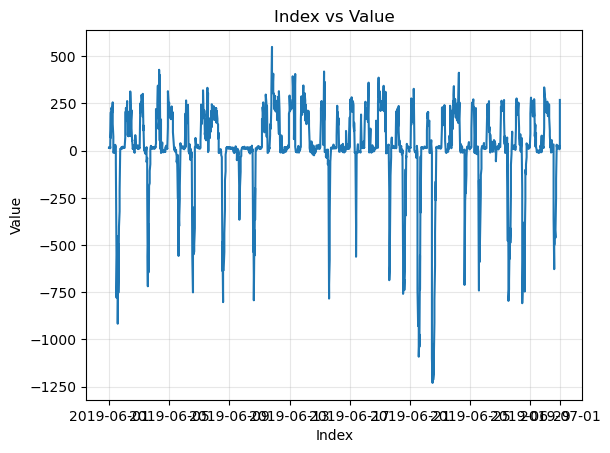

In [33]:
import matplotlib.pyplot as plt

plt.plot(df['datetime'],df['net_load'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Index vs Value')
plt.grid(alpha=0.3) 
plt.show()

(array([18048., 18052., 18056., 18060., 18064., 18068., 18072., 18076.,
        18078.]),
 [Text(18048.0, 0, '2019-06-01'),
  Text(18052.0, 0, '2019-06-05'),
  Text(18056.0, 0, '2019-06-09'),
  Text(18060.0, 0, '2019-06-13'),
  Text(18064.0, 0, '2019-06-17'),
  Text(18068.0, 0, '2019-06-21'),
  Text(18072.0, 0, '2019-06-25'),
  Text(18076.0, 0, '2019-06-29'),
  Text(18078.0, 0, '2019-07-01')])

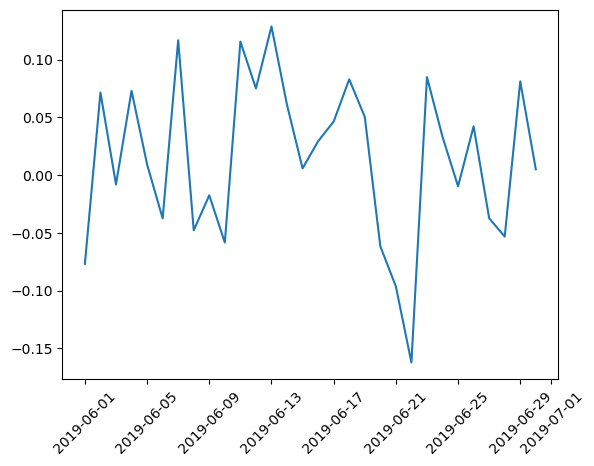

In [34]:
avg_load_day = df.groupby(df['datetime'].dt.date)['net_load_norm'].mean()
plt.plot(avg_load_day)
plt.xticks(rotation=45) 

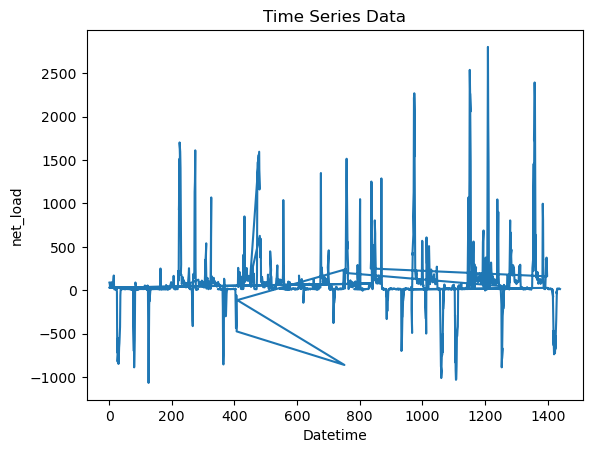

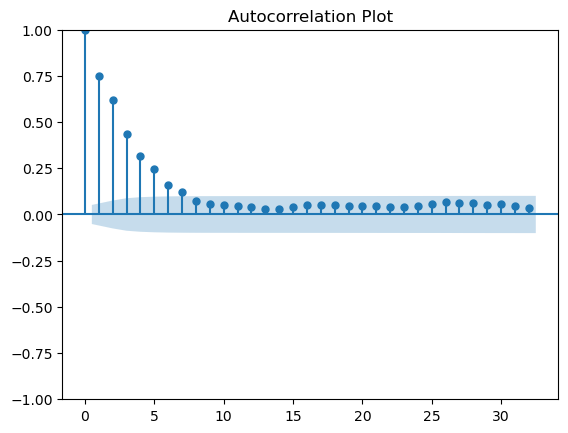

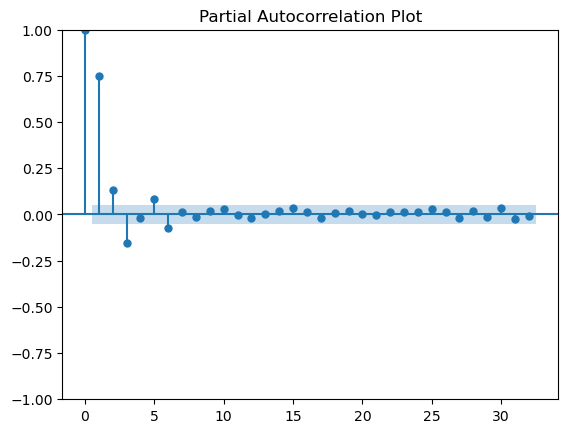

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = df.sort_values(by='datetime')

# Plot the time series data
df['net_load'].plot()
plt.xlabel('Datetime')
plt.ylabel('net_load')
plt.title('Time Series Data')
plt.show()

# Plot autocorrelation and partial autocorrelation plots
plot_acf(df['net_load'])
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(df['net_load'])
plt.title('Partial Autocorrelation Plot')
plt.show()

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
'''
df = df.sort_values(by='datetime')
results = pd.DataFrame()
for x in range(4,0,-1):
    vals = x*-24
    train_data = df.iloc[:vals]  
    test_data = df.iloc[vals:]
    test_data = test_data.iloc[:24]

    model = SARIMAX(train_data['net_load_norm'], exog=train_data[['solar_radiation','weekend_or_bank_holiday']], order=(4, 1, 3), seasonal_order=(2, 1, 1, 24))
    sarimax_model = model.fit()

    sarimax_params = sarimax_model.params

    print("SARIMAX Parameters:")
    print(sarimax_params)

    forecast_horizon = 24
    forecast = sarimax_model.forecast(steps=forecast_horizon, exog=test_data[['solar_radiation','weekend_or_bank_holiday']])
    #print('Forecasted Values:', forecast)
    df_final = pd.DataFrame()
    df_final = pd.concat([test_data, forecast], axis=1)
    print(df_final)

    results = pd.concat([results, df_final],ignore_index=True)

results = results.rename(columns={results.columns[-1]: 'forecast'})

plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['net_load_norm'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()
'''

'\ndf = df.sort_values(by=\'datetime\')\nresults = pd.DataFrame()\nfor x in range(4,0,-1):\n    vals = x*-24\n    train_data = df.iloc[:vals]  \n    test_data = df.iloc[vals:]\n    test_data = test_data.iloc[:24]\n\n    model = SARIMAX(train_data[\'net_load_norm\'], exog=train_data[[\'solar_radiation\',\'weekend_or_bank_holiday\']], order=(4, 1, 3), seasonal_order=(2, 1, 1, 24))\n    sarimax_model = model.fit()\n\n    sarimax_params = sarimax_model.params\n\n    print("SARIMAX Parameters:")\n    print(sarimax_params)\n\n    forecast_horizon = 24\n    forecast = sarimax_model.forecast(steps=forecast_horizon, exog=test_data[[\'solar_radiation\',\'weekend_or_bank_holiday\']])\n    #print(\'Forecasted Values:\', forecast)\n    df_final = pd.DataFrame()\n    df_final = pd.concat([test_data, forecast], axis=1)\n    print(df_final)\n\n    results = pd.concat([results, df_final],ignore_index=True)\n\nresults = results.rename(columns={results.columns[-1]: \'forecast\'})\n\nplt.figure(figsize=(1

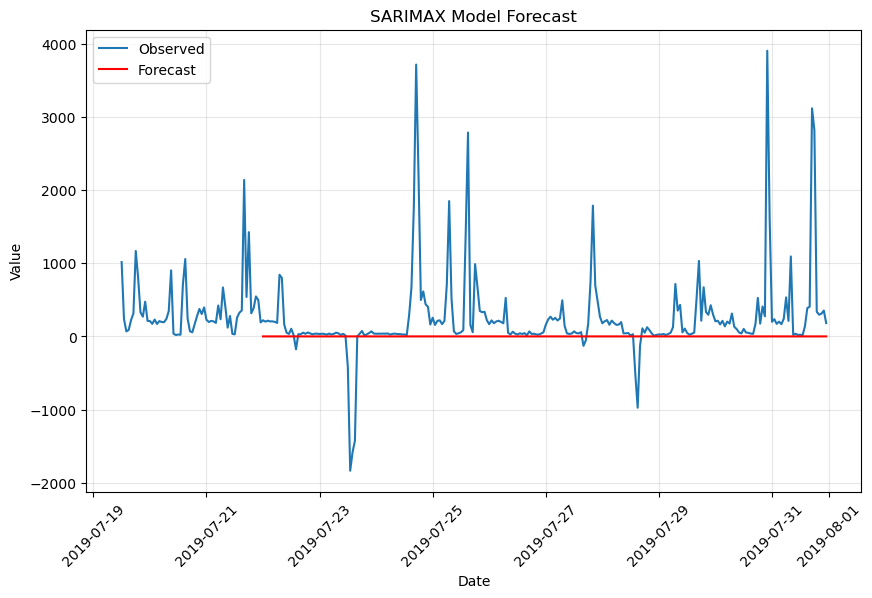

In [39]:
df2 = df[-300:]
plt.figure(figsize=(10, 6))
plt.plot(df2['datetime'], df2['net_load'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()


In [35]:
import pmdarima as pm

train_data = df.iloc[:-288]  
model_auto = pm.auto_arima(train_data['net_load_norm'], exogenous=train_data[['solar_radiation','weekend_or_bank_holiday']], seasonal=True, m=48)
#sarimax_model = model.fit()

SARIMAX Parameters:
<bound method ARIMA.params of ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(2, 0, 1, 48),
      suppress_warnings=True)>
[ 0.0182707   0.02216931  0.0185431   0.02200565  0.02565764  0.03518382
  0.05800664  0.07125304  0.07313221  0.06665742  0.06563767  0.07086994
  0.07934565  0.05874996  0.04053908  0.03094738  0.02213817  0.01586588
  0.03016204  0.00982398  0.00975292  0.00753897  0.00725666 -0.0102068
 -0.01693198 -0.02199742 -0.02714134 -0.03032589 -0.1011014  -0.04423144
 -0.07670176 -0.12192976 -0.07213231 -0.05825309 -0.02395224 -0.02997605
 -0.00708583  0.01260896  0.01479756  0.01773771  0.02024786  0.01676223
  0.02128305  0.02158612  0.03064859  0.02273747  0.02096431  0.02197141]
      site  year  month  day  hour  minute  day_of_week  season  net_load  \
1151    20  2019      6   27     0       0            2       3     19.12   
1152    20  2019      6   27     0      30            2       3     20.27   
1154    20  2019      6   27     1

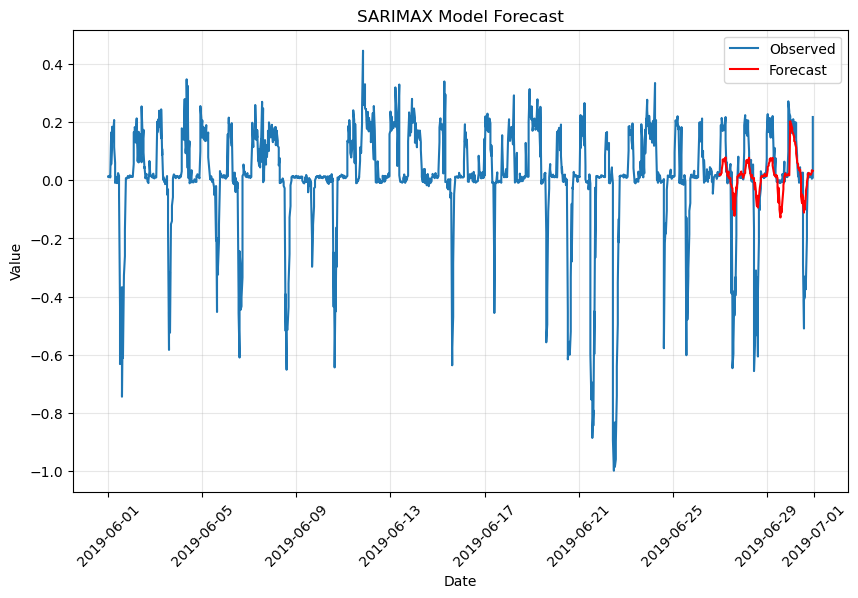

In [36]:
results = pd.DataFrame()
for x in range(4,0,-1):
    vals = -x*48
    train_data = df.iloc[:vals]  
    test_data = df.iloc[vals:]
    test_data = test_data.iloc[:48]

    model_auto.update(train_data['net_load_norm'], exog=train_data[['solar_radiation','weekend_or_bank_holiday']], maxiter=5)

    sarimax_params = model_auto.params

    print("SARIMAX Parameters:")
    print(sarimax_params)

    #forecast_horizon = 24
    #forecast = model.forecast(steps=forecast_horizon, exog=test_data[['solar_radiation','weekend_or_bank_holiday']])
    forecast, conf_int = model_auto.predict(n_periods=48, exogenous=test_data[['solar_radiation','weekend_or_bank_holiday']], return_conf_int=True)
    print(forecast)
    df_final = pd.DataFrame(test_data)
    df_final['forecast'] = forecast 
    print(df_final)

    results = pd.concat([results, df_final],ignore_index=True)

results = results.rename(columns={results.columns[-1]: 'forecast'})

plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['net_load_norm'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

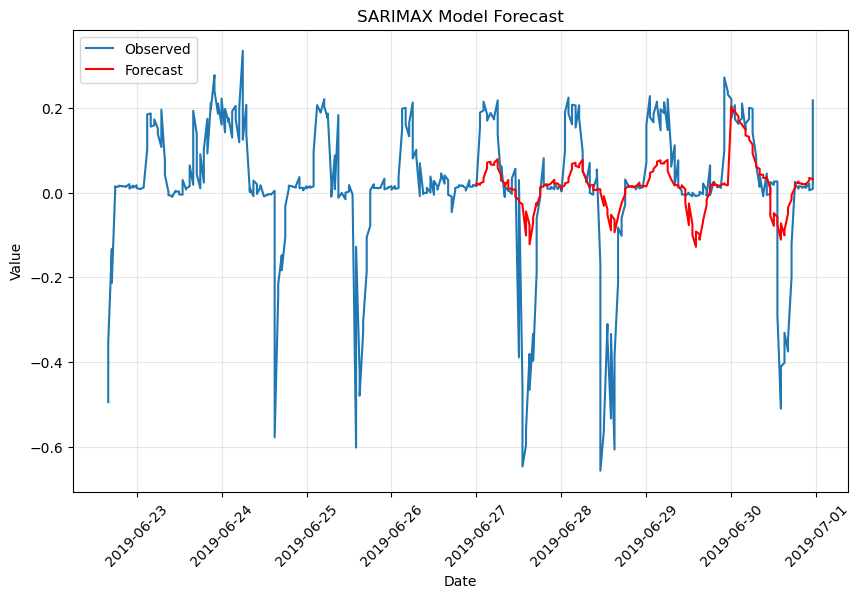

In [37]:
df2 = df[-400:]
plt.figure(figsize=(10, 6))
plt.plot(df2['datetime'], df2['net_load_norm'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

In [43]:
print(results['forecast'])

0      0.022614
1      0.027199
2      0.026350
3      0.026145
4      0.025836
         ...   
235    0.035877
236    0.040565
237    0.032551
238    0.133087
239    0.068139
Name: forecast, Length: 240, dtype: float64


c:\Users\xlow6\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


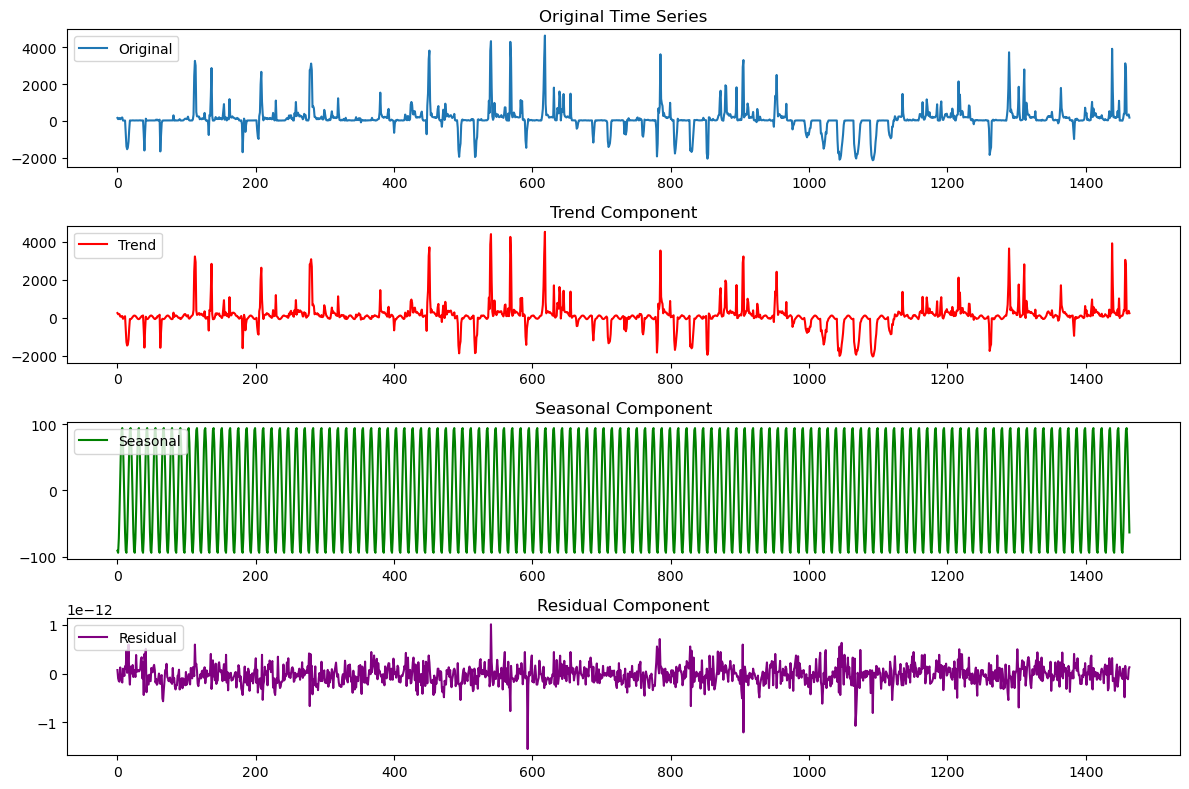

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df.set_index('datetime', inplace=True)

# Function to decompose time series using Fourier transform
def decompose_fourier(data):
    
    # Compute FFT of the time series data
    fft_values = np.fft.fft(data)
    
    # Compute the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(data))
    
    # Find the index of the highest amplitude frequency (excluding the DC component)
    highest_freq_index = np.argmax(np.abs(fft_values[1:])) + 1
    
    # Construct the signal corresponding to the highest amplitude frequency
    reconstructed_signal = np.fft.ifft(np.zeros_like(fft_values))
    reconstructed_signal[highest_freq_index] = fft_values[highest_freq_index]
    
    # Compute the trend component by removing the highest amplitude frequency from the original signal
    trend_component = np.fft.ifft(fft_values - reconstructed_signal)
    
    # Compute the seasonal component by keeping only the highest amplitude frequency
    seasonal_component = np.fft.ifft(reconstructed_signal)
    
    # Compute the residual component by subtracting the trend and seasonal components from the original signal
    residual_component = data - trend_component - seasonal_component
    
    return trend_component, seasonal_component, residual_component

# Decompose the time series data using Fourier transform
trend, seasonal, residual = decompose_fourier(df['net_load'])

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['net_load'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


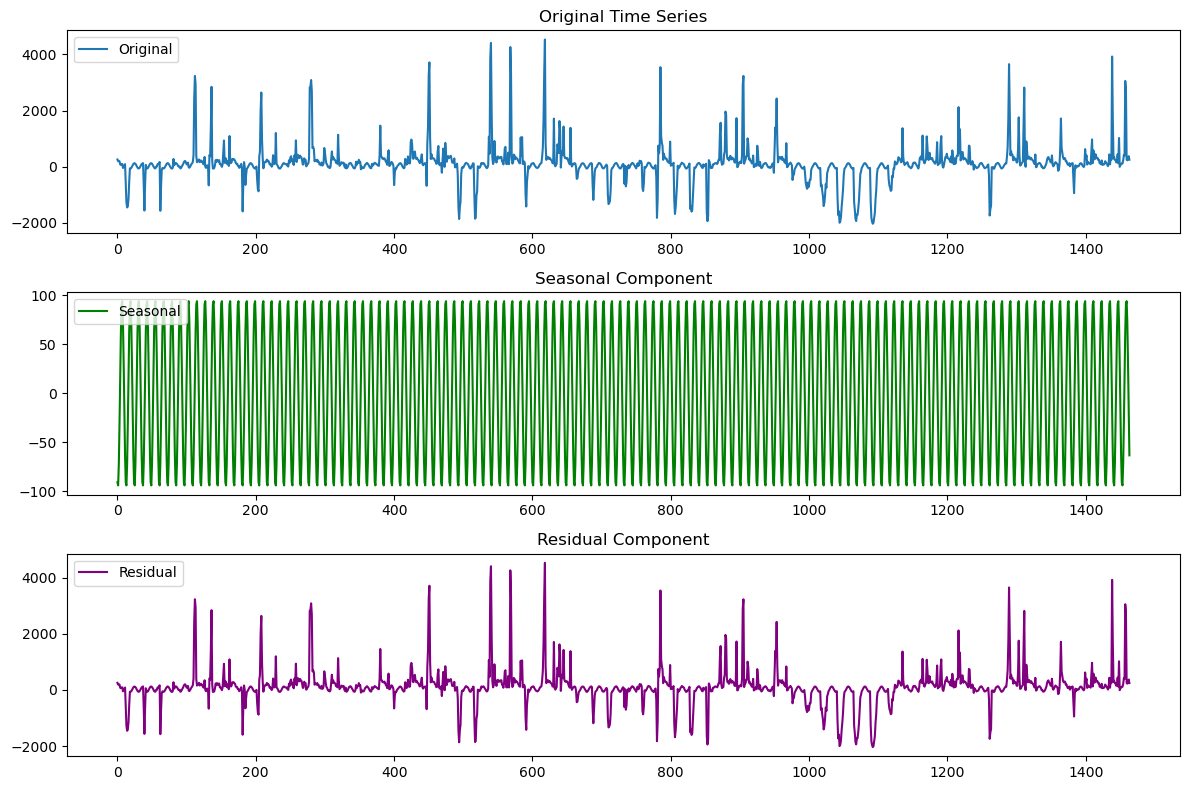

1464


In [45]:
def decompose_fourier_multiple(data, seasonal_periods):
    # Compute FFT of the time series data
    fft_values = np.fft.fft(data)
    
    # Compute the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(data))
    
    # Initialize reconstructed signal as zeros
    reconstructed_signal = np.zeros_like(fft_values)
    
    # Iterate over seasonal periods
    for period in seasonal_periods:
        # Find the index of the highest amplitude frequency for the current period (excluding the DC component)
        highest_freq_index = np.argmax(np.abs(fft_values[1:])) + 1
        
        # Construct the signal corresponding to the highest amplitude frequency
        reconstructed_signal[highest_freq_index] = fft_values[highest_freq_index]
        
        # Compute the seasonal component by keeping only the highest amplitude frequency for the current period
        seasonal_component = np.fft.ifft(reconstructed_signal)
        
        # Subtract the seasonal component from the original signal
        data -= seasonal_component
        
        # Reset the reconstructed signal for the next seasonal component
        reconstructed_signal = np.zeros_like(fft_values)
    
    # Compute the residual component (what remains after removing all seasonal components)
    residual_component = data
    
    return seasonal_component, residual_component

# Decompose the time series data using Fourier transform with multiple seasonal components
seasonal, residual = decompose_fourier_multiple(df['net_load'], seasonal_periods=[24])  # Example seasonal periods

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(df.index, df['net_load'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(312)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(313)
plt.plot(df.index, residual, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()
print(len(seasonal))

In [46]:
from scipy.optimize import curve_fit

T_d = 24  # Period of one day (in hours)
T_y = 365 * 24  # Period of one year (in hours)

def fourier_series(t, a0, *params):
    N = len(params) // 6  # Number of harmonics
    an = params[:N]
    bn = params[N:2*N]
    cm = params[2*N:3*N]
    dm = params[3*N:]
    series_day = sum(a * np.cos(2 * np.pi * n * t / T_d) + b * np.sin(2 * np.pi * n * t / T_d) for n, (a, b) in enumerate(zip(an, bn), start=1))
    series_year = sum(c * np.cos(2 * np.pi * m * t / T_y) + d * np.sin(2 * np.pi * m * t / T_y) for m, (c, d) in enumerate(zip(cm, dm), start=1))
    print(series_day)
    print(series_year)
    return a0 + series_day + series_year

# Initial guess for parameters
initial_guess = [np.mean(df['net_load'])] + [0] * 4

# Fit Fourier series to data
params, _ = curve_fit(fourier_series, np.arange(len(df)), df['net_load'], p0=initial_guess)

# Reconstruct seasonality
seasonality = fourier_series(np.arange(len(df)), params[0],params)

# Plot original data and reconstructed seasonality
plt.figure(figsize=(10, 6))
#plt.plot(df.index, df['net_load'], label='Observed Data', color='blue')
plt.plot(seasonality)
#plt.plot(df.index, seasonality, label='Seasonality', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data and Reconstructed Seasonality')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\xlow6\AppData\Roaming\Python\Python311\site-packages\pandas\core\series.py:1022: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.asarray(values, dtype=dtype)


0
0


TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'